In [44]:
import numpy as np
import matplotlib.style as style
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
from mpl_toolkits import mplot3d
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import animation
from matplotlib.animation import FuncAnimation, PillowWriter
import math
import os
import sys

In [45]:
mosPerNode = 10
fwMaxNode = 25
mwMaxNode = 25
rMaxNode = 25
fwMax = 25 * mosPerNode
mwMax = 25 * mosPerNode
rMax = 25 * mosPerNode

In [46]:
data  = np.loadtxt('male_controls_output.txt') #list of lists. Every gRegularMaxNodes corresponds to one incriment in regular mosquito units
print(data)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [20. 20. 20. ... 20. 20. 20.]
 [20. 20. 20. ... 20. 20. 20.]
 [20. 20. 20. ... 20. 20. 20.]]


In [47]:
##Fw data range
plottingData = []

twodDim = fwMax * mwMax

#Every multiple of fwMax rows constitutes ONE r-max value 
for i in range (0, rMaxNode):
    matrix = []
    for i in range (0, fwMaxNode):
        row = data[i]
        matrix.append(row)
    plottingData.append(matrix)

print(len(plottingData))
##Mw data range
plottingData = np.asarray(plottingData)
##R type data range 

25


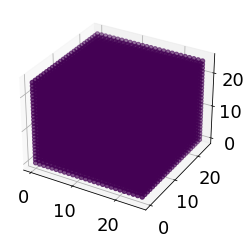

In [48]:
fig = plt.figure()
ax = plt.axes(projection='3d')
counterX = range(fwMaxNode + 1)
counterY = range(rMaxNode)
x,y,z = np.meshgrid(counterX, counterY, counterY)
ax.scatter(x,y,z, c=plottingData.flat)

In [49]:
## Todo: 4/30/21 - I think looking at the controls at every point in the domain isn't going to be effective in this case b/c too dense/
##Instead, write a trajectory tracer so that we can trace selected curves in 3D space

In [82]:
mpl.rcParams['font.size'] = 18

#Read txt file and sort each line into its own list
with open('opt_trajectories.txt') as f:    
    
    #Position values
    line1 = f.readline()
    fwNums = [float(num) for num in line1.split(' ')]
    
    #Velocity values
    line2 = f.readline()
    mwNums = [float(num) for num in line2.split(' ')]
    
    #Time values 
    line3 = f.readline()
    rNums = [float(num) for num in line3.split(' ')]
    
    #Time Values 
    line4 = f.readline()
    timeVals = [float(num) for num in line4.split(' ')]
    
    line5 = f.readline()
    fwOCVals = [float(num) for num in line5.split(' ')]
    
    #line6 = f.readline()
    #mwOCVals = [float(num) for num in line6.split(' ')]

print(fwOCVals)

[10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## Optimal Trajectories:

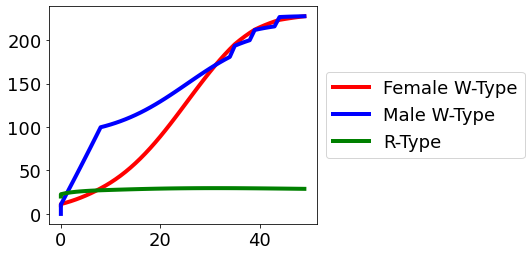

In [83]:
fig = plt.figure(2)
ax = plt.subplot()

ax.plot(timeVals,fwNums,color= 'red', linewidth=4, label='Female W-Type')
ax.plot(timeVals,mwNums,color='blue', linewidth=4, label='Male W-Type')
plt.plot(timeVals,rNums,color='green', linewidth=4, label='R-Type')
#plt.plot(timeVals,fwOCVals,color='black', linewidth=4, label='$A^*_{WF}$')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))